In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively, plot_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [32]:
# No undersampling
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9897 0.9241


In [35]:
# Model performance at 250 estimators
classifier = GradientBoostingClassifier(n_estimators=250, random_state=0, max_depth=4)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0 0.9499


In [33]:
# Model performance at 250 estimators
classifier = GradientBoostingClassifier(n_estimators=250, random_state=0)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0 0.9422


In [34]:
# Model performance at 250 estimators
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0, max_depth=4)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9999 0.9397


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

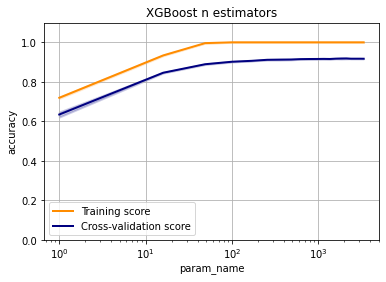

In [9]:
# optimize number of weak classifiers

param_range = list(exp_range(1, 60, 3, 2))


cv = KFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost n estimators')


In [10]:
labeled_test

array([[1.000e+00, 6.348e-01],
       [1.600e+01, 8.462e-01],
       [4.900e+01, 8.892e-01],
       [1.000e+02, 9.018e-01],
       [1.690e+02, 9.064e-01],
       [2.560e+02, 9.116e-01],
       [3.610e+02, 9.124e-01],
       [4.840e+02, 9.130e-01],
       [6.250e+02, 9.150e-01],
       [7.840e+02, 9.156e-01],
       [9.610e+02, 9.158e-01],
       [1.156e+03, 9.162e-01],
       [1.369e+03, 9.158e-01],
       [1.600e+03, 9.174e-01],
       [1.849e+03, 9.180e-01],
       [2.116e+03, 9.184e-01],
       [2.401e+03, 9.172e-01],
       [2.704e+03, 9.172e-01],
       [3.025e+03, 9.172e-01],
       [3.364e+03, 9.170e-01]])

In [4]:
# Model performance at 250 estimators
classifier = GradientBoostingClassifier(n_estimators=250, random_state=0)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0 0.9279


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

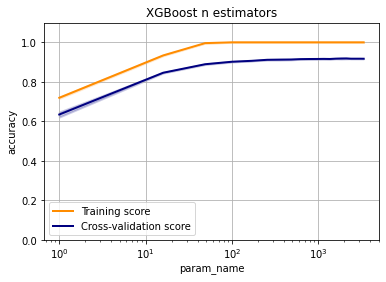

In [3]:
# optimize number of weak classifiers

param_range = list(exp_range(1, 60, 3, 2))


cv = KFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, max_depth=3)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost n estimators')


In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

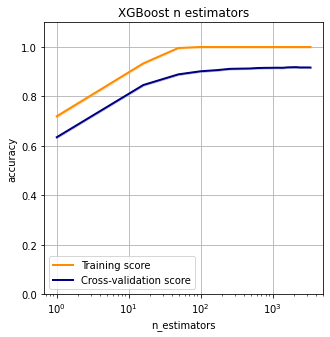

In [15]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='XGBoost n estimators',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='n_estimators')

In [16]:
labeled_test

array([[1.000e+00, 6.348e-01],
       [1.600e+01, 8.462e-01],
       [4.900e+01, 8.892e-01],
       [1.000e+02, 9.018e-01],
       [1.690e+02, 9.064e-01],
       [2.560e+02, 9.116e-01],
       [3.610e+02, 9.124e-01],
       [4.840e+02, 9.130e-01],
       [6.250e+02, 9.150e-01],
       [7.840e+02, 9.156e-01],
       [9.610e+02, 9.158e-01],
       [1.156e+03, 9.162e-01],
       [1.369e+03, 9.158e-01],
       [1.600e+03, 9.174e-01],
       [1.849e+03, 9.180e-01],
       [2.116e+03, 9.184e-01],
       [2.401e+03, 9.172e-01],
       [2.704e+03, 9.172e-01],
       [3.025e+03, 9.172e-01],
       [3.364e+03, 9.170e-01]])

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

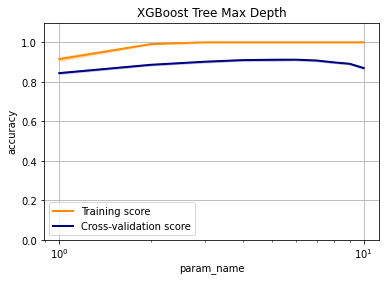

In [18]:
# optimize number of weak classifiers

param_range = range(1, 11)
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = GradientBoostingClassifier(random_state=0, n_estimators=100)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost Tree Max Depth')


In [19]:
labeled_test

array([[ 1.    ,  0.8442],
       [ 2.    ,  0.8864],
       [ 3.    ,  0.9018],
       [ 4.    ,  0.91  ],
       [ 5.    ,  0.9116],
       [ 6.    ,  0.9122],
       [ 7.    ,  0.908 ],
       [ 8.    ,  0.8984],
       [ 9.    ,  0.8914],
       [10.    ,  0.8698]])

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

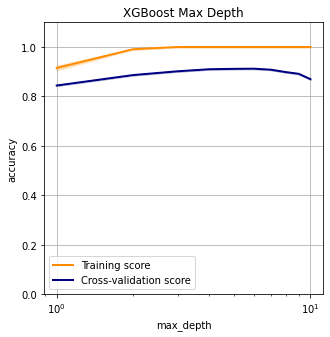

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='XGBoost Max Depth',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='max_depth')

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

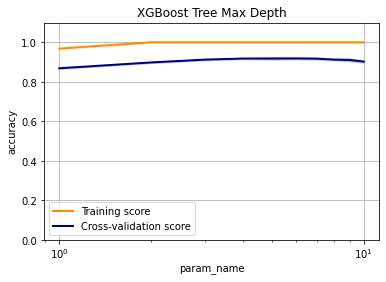

In [21]:
# optimize number of weak classifiers

param_range = range(1, 11)
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = GradientBoostingClassifier(random_state=0, n_estimators=250)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost Tree Max Depth')


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

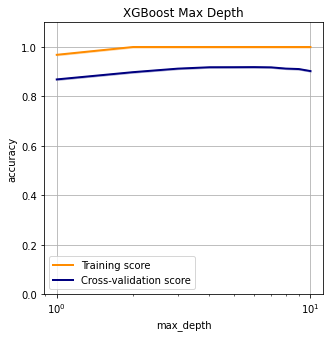

In [22]:
# n_estimators set at 250train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='XGBoost Max Depth',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='max_depth')

In [23]:
labeled_test

array([[ 1.    ,  0.8688],
       [ 2.    ,  0.8982],
       [ 3.    ,  0.9124],
       [ 4.    ,  0.918 ],
       [ 5.    ,  0.9182],
       [ 6.    ,  0.9186],
       [ 7.    ,  0.9176],
       [ 8.    ,  0.9126],
       [ 9.    ,  0.9108],
       [10.    ,  0.9026]])

iteration 1


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

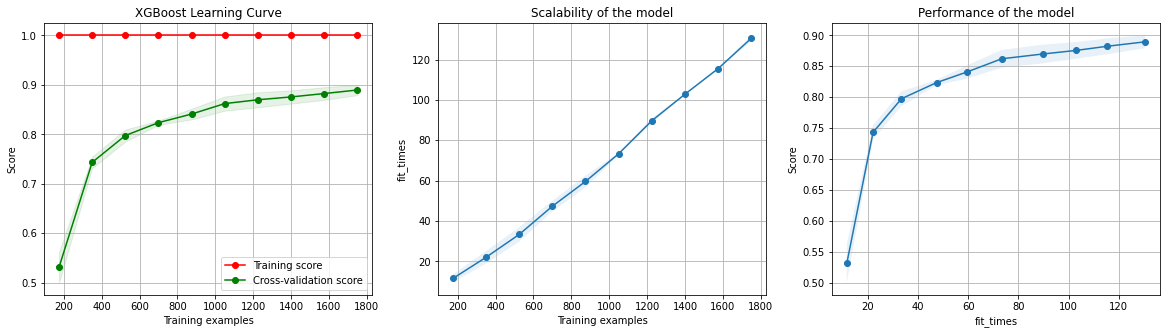

In [3]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:5000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:5000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:5000]
    y_test_ohe = np.load(f6)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=4)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'XGBoost Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)


In [4]:
print(results)

{'train_sizes': array([ 175,  350,  525,  700,  875, 1050, 1225, 1400, 1575, 1750]), 'train_scores_mean': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_scores_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_scores_mean': array([0.53142857, 0.74342857, 0.79771429, 0.82371429, 0.84114286,
       0.86228571, 0.87      , 0.87571429, 0.88257143, 0.88971429]), 'test_scores_std': array([0.03085714, 0.01142857, 0.012     , 0.00428571, 0.01085714,
       0.01428571, 0.01514286, 0.01342857, 0.01285714, 0.01028571]), 'fit_times_mean': array([ 11.54898071,  22.04793346,  33.36311948,  47.34802032,
        59.63100886,  73.34566331,  89.70559692, 102.85422528,
       115.53623593, 130.55382025]), 'fit_times_std': array([2.00642729, 3.06922686, 3.55984104, 2.64241886, 2.90859103,
       0.3752799 , 1.22462344, 0.05882394, 0.12822258, 1.40913761]), 'fit_times_train_size_ratio': 0.07126593293772115, 'fit_times_test_score_ratio': 84.49849063210903, 'score_times_test_size_ratio': 

iteration 1


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

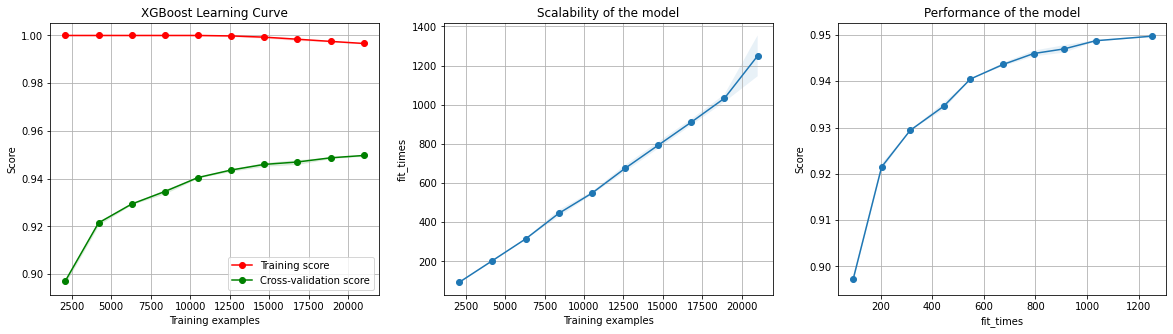

In [38]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)
    X_test = np.load(f2)
    y_train = np.load(f3)
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)
    y_test_ohe = np.load(f6)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=4)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'XGBoost Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)


In [ ]:
print(results)